<a href="https://colab.research.google.com/github/brasfonseca/datascience/blob/main/ImagemColoridaNiveisCinzaPretoBranco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redução de Dimensionalidade em Imagens para Redes Neurais**

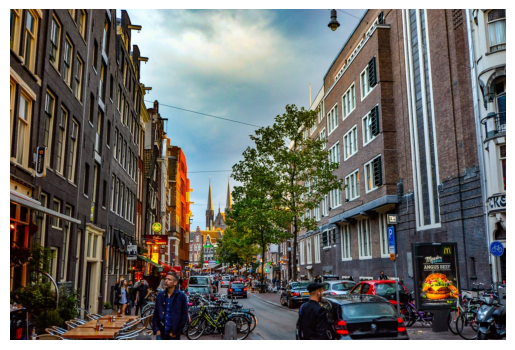

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

caminho_imagem = '/content/drive/MyDrive/Colab Notebooks/img/carpersontree.jpg'
imagem = Image.open(caminho_imagem)

plt.imshow(imagem)
plt.axis('off')
plt.show()

### **Níveis de cinza - Sem Biblioteca**

In [1]:
def color_to_grayscale(image_path, output_path):
    """Converts a color image to grayscale without using external libraries.

    Args:
        image_path: The path to the input color image.
        output_path: The path to save the grayscale image.
    """
    with open(image_path, 'rb') as file:
        img_data = file.read()

    # Find the start of the image data (skip JPEG header)
    # This is a simplified approach, and might not work for all JPEGs
    # You might need a more robust JPEG header parser for complex cases
    header_end = img_data.find(b'\xff\xda') + 2  # Start of scan data marker
    data = img_data[header_end:]

    # Converte cada pixel para grayscale
    grayscale_data = bytearray()
    i = 0
    while i < len(data):
        # Check for restart markers (every 8 lines in JPEG)
        if data[i:i + 2] in (b'\xff\xd0', b'\xff\xd1', b'\xff\xd2', b'\xff\xd3',
                             b'\xff\xd4', b'\xff\xd5', b'\xff\xd6', b'\xff\xd7'):
            i += 2  # Skip restart marker
            continue
        # Extrai os valores RGB
        try:
            r = data[i + 2]
            g = data[i + 1]
            b = data[i]
        except IndexError:
            # Handle padding or end of data
            break

        # Calcula a média ponderada dos valores RGB para obter o valor de cinza
        gray = int(0.299 * r + 0.587 * g + 0.114 * b)

        # Define o mesmo valor de cinza para os três canais (R, G, B)
        grayscale_data.extend([gray, gray, gray])

        i += 3

    # Write the grayscale data to the output file
    # (we assume the header is mostly the same for grayscale JPEG)
    with open(output_path, 'wb') as file:
        file.write(img_data[:header_end] + grayscale_data)

# Uso da função
color_to_grayscale('/content/drive/MyDrive/Colab Notebooks/img/carpersontree.jpg', '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_cinza.jpg')

# **Níveis de Cinza - Com Biblioteca PIL**

In [9]:
from PIL import Image

def converter_para_escala_de_cinza(caminho_imagem, caminho_saida):
    """Converte uma imagem colorida para escala de cinza usando a biblioteca PIL.

    Args:
        caminho_imagem: O caminho para a imagem colorida de entrada.
        caminho_saida: O caminho para salvar a imagem em escala de cinza.
    """
    # Abre a imagem usando PIL
    imagem = Image.open(caminho_imagem)

    # Converte a imagem para escala de cinza
    imagem_escala_de_cinza = imagem.convert("L")

    # Salva a imagem em escala de cinza
    imagem_escala_de_cinza.save(caminho_saida)

# Uso da função
converter_para_escala_de_cinza('/content/drive/MyDrive/Colab Notebooks/img/carpersontree.jpg', '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_cinza.jpg')

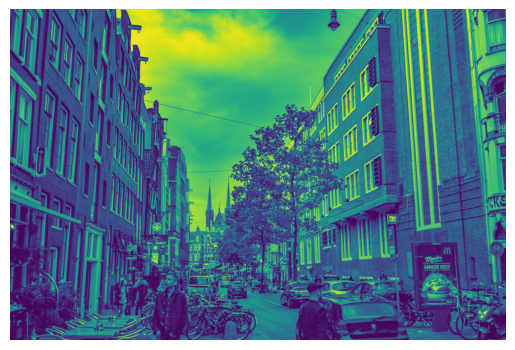

In [10]:
caminho_imagem = '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_cinza.jpg'
imagem = Image.open(caminho_imagem)

plt.imshow(imagem)
plt.axis('off')
plt.show()

**Binarizada (Preto e Branco) - Sem biblioteca**

In [ ]:
def carregar_imagem(caminho):
    with open(caminho, 'rb') as arquivo:
        arquivo.seek(18)
        largura = int.from_bytes(arquivo.read(4), 'little')
        altura = int.from_bytes(arquivo.read(4), 'little')
        arquivo.seek(54)
        pixels = arquivo.read()
        return largura, altura, pixels

def salvar_imagem(caminho, largura, altura, pixels):
    with open(caminho, 'wb') as arquivo:
        # Cabeçalho BMP
        arquivo.write(b'BM')
        arquivo.write((14 + 40 + largura * altura).to_bytes(4, 'little')) # Tamanho do arquivo
        arquivo.write(b'\x00\x00')
        arquivo.write(b'\x00\x00')
        arquivo.write((14 + 40).to_bytes(4, 'little')) # Offset dos dados da imagem
        # Informação do DIB Header
        arquivo.write((40).to_bytes(4, 'little'))
        arquivo.write((largura).to_bytes(4, 'little'))
        arquivo.write((altura).to_bytes(4, 'little'))
        arquivo.write(b'\x01\x00') # Planos
        arquivo.write(b'\x18\x00') # Bits por pixel
        arquivo.write(b'\x00\x00\x00\x00') # Compressão
        arquivo.write((largura * altura).to_bytes(4, 'little')) # Tamanho da imagem
        arquivo.write(b'\x00\x00\x00\x00')
        arquivo.write(b'\x00\x00\x00\x00')
        arquivo.write(b'\x00\x00\x00\x00')
        arquivo.write(b'\x00\x00\x00\x00')
        # Dados dos pixels
        arquivo.write(pixels)

def converter_para_binarizada(largura, altura, pixels):
    binarizada_pixels = bytearray()
    limiar = 128  # Limiar para binarização (0-255)
    for i in range(0, len(pixels) - 2, 3): # Changed loop condition
        # Média dos valores RGB para obter o valor em tons de cinza
        media = (pixels[i] + pixels[i+1] + pixels[i+2]) // 3
        # Binarização
        cor = 255 if media >= limiar else 0
        binarizada_pixels.extend([cor, cor, cor])
    return binarizada_pixels

caminho_entrada = '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_cinza_bmp.bmp'
caminho_saida = '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_binarizada.bmp'

largura, altura, pixels = carregar_imagem(caminho_entrada)
binarizada_pixels = converter_para_binarizada(largura, altura, pixels)
salvar_imagem(caminho_saida, largura, altura, binarizada_pixels)

print('Imagem binarizada salva em', caminho_saida)


Imagem binarizada salva em /content/drive/MyDrive/Colab Notebooks/img/carpersontree_binarizada.bmp


**Binarizada - Com biblioteca**

In [15]:
from PIL import Image

# Carregar a imagem em tons de cinza
imagem = Image.open('/content/drive/MyDrive/Colab Notebooks/img/carpersontree_cinza.jpg').convert('L')

# Definir o limiar para binarização
limiar = 128

# Binarizar a imagem
binarizada = imagem.point(lambda p: 255 if p >= limiar else 0)

# Caminho para salvar a imagem binarizada no Google Drive
caminho_saida = '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_binarizada.jpg'

# Salvar a imagem binarizada
binarizada.save(caminho_saida)

print(f'Imagem binarizada salva em {caminho_saida}')

Imagem binarizada salva em /content/drive/MyDrive/Colab Notebooks/img/carpersontree_binarizada.jpg


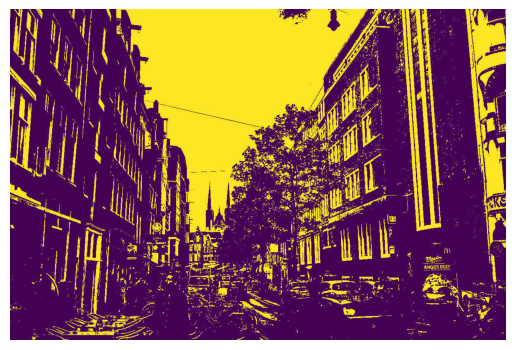

In [16]:
caminho_imagem = '/content/drive/MyDrive/Colab Notebooks/img/carpersontree_binarizada.jpg'
imagem = Image.open(caminho_imagem)

plt.imshow(imagem)
plt.axis('off')
plt.show()